In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("House_Rent_main6.csv")
df

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,1,Bandel,1,1,Bachelors/Family,2
1,2,20000,800,1,"Phool Bagan, Kankurgachi",1,2,Bachelors/Family,1
2,2,17000,1000,1,Salt Lake City Sector 2,1,2,Bachelors/Family,1
3,2,10000,800,1,Dumdum Park,1,1,Bachelors/Family,1
4,2,7500,850,2,South Dum Dum,1,1,Bachelors,1
...,...,...,...,...,...,...,...,...,...
4714,2,15000,1000,2,Bandam Kommu,6,2,Bachelors/Family,2
4715,3,29000,2000,1,"Manikonda, 6",6,2,Bachelors/Family,3
4716,3,35000,1750,2,"Himayath Nagar, NH 7",6,2,Bachelors/Family,3
4717,3,45000,1500,2,Gachibowli,6,2,Family,2


In [5]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Size', 'Rent']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


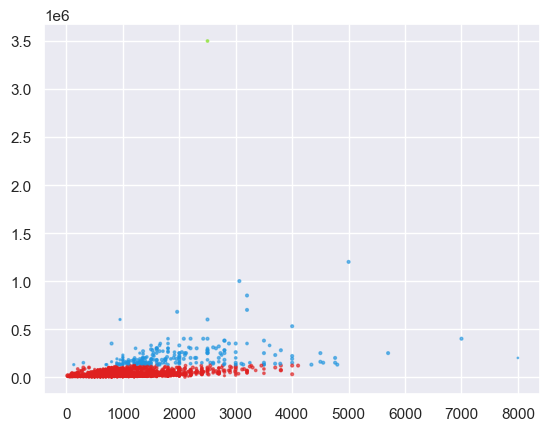

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df.Size, df.Rent, c=df.c, s=df.BHK, alpha = 0.6)


C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0, 'BHK')

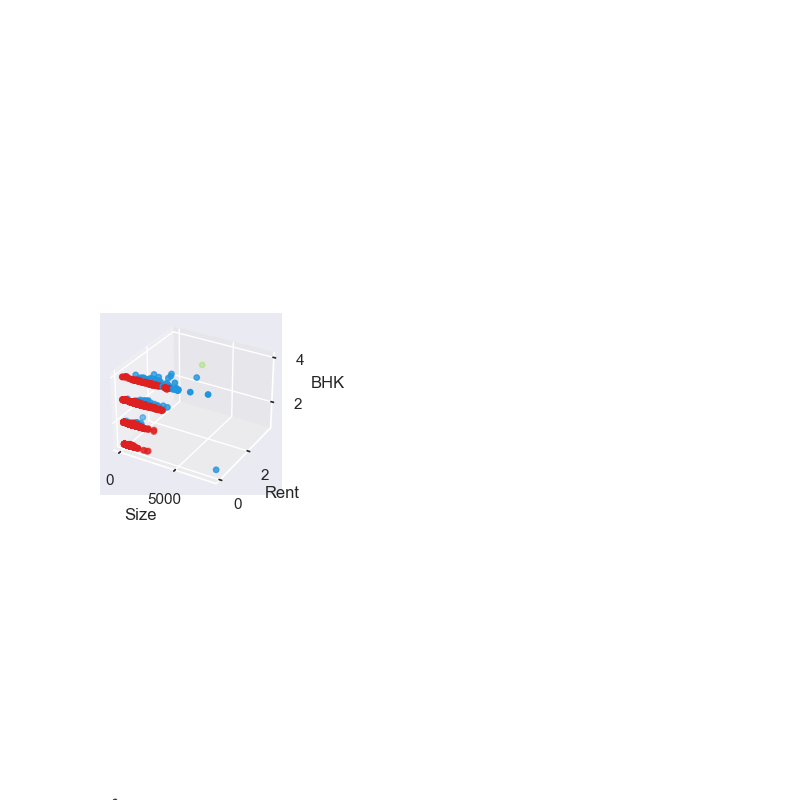

In [19]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Size', 'Rent', 'BHK']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Size, df.Rent, df.BHK, c=df.c, s=15)
ax.set_xlabel('Size')
ax.set_ylabel('Rent')
ax.set_zlabel('BHK')
